This notebook demonstrates a simple linear regression analysis using R to model Salary based on Years of Experience

In [1]:
dataset <- read.csv("regression_data.csv") # Reading in the csv file

In [2]:
print(dataset) # Double Checking the dataset to make sure everything worked.

   YearsExperience Salary
1              1.1  39343
2              1.3  46205
3              1.5  37731
4              2.0  43525
5              2.2  39891
6              2.9  56642
7              3.0  60150
8              3.2  54445
9              3.7  57189
10             4.0  63218


The cell below shows the graph of the regression_data.csv file which we are using to create our regression.

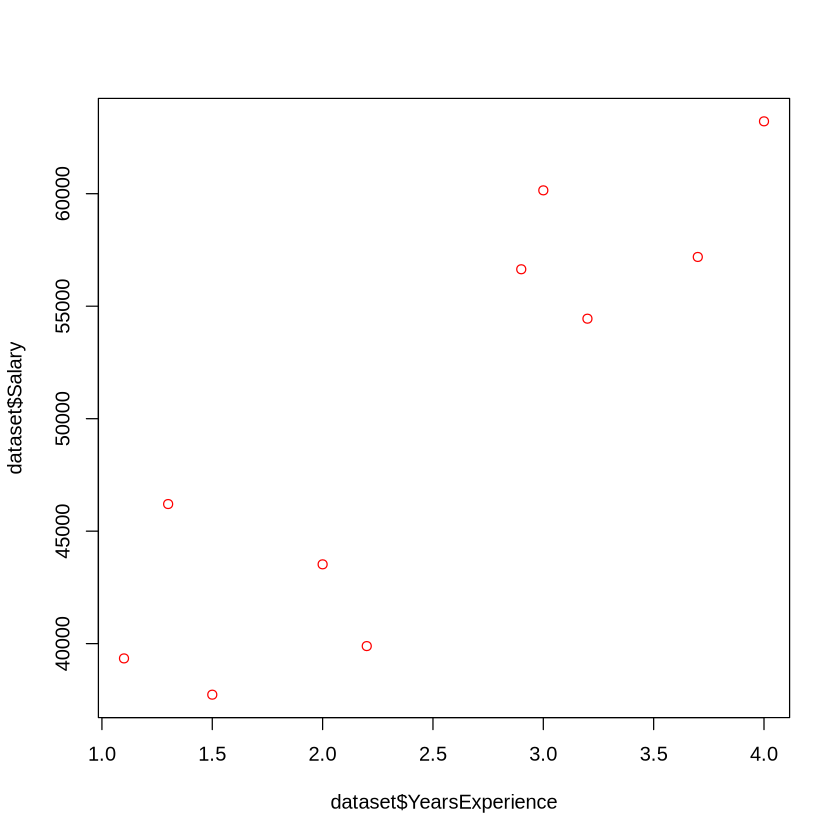

In [3]:
plot(dataset$YearsExperience, dataset$Salary, col="red")

In [4]:
model <- lm(Salary ~ YearsExperience, data=dataset) # Making a linear model of the dataset in order to run a regression analysis

In [5]:
library(ggplot2) # Installing ggplot2 in order to run the regression.

The cell below displays the regression line from our linear model over the scatterplot of the data.

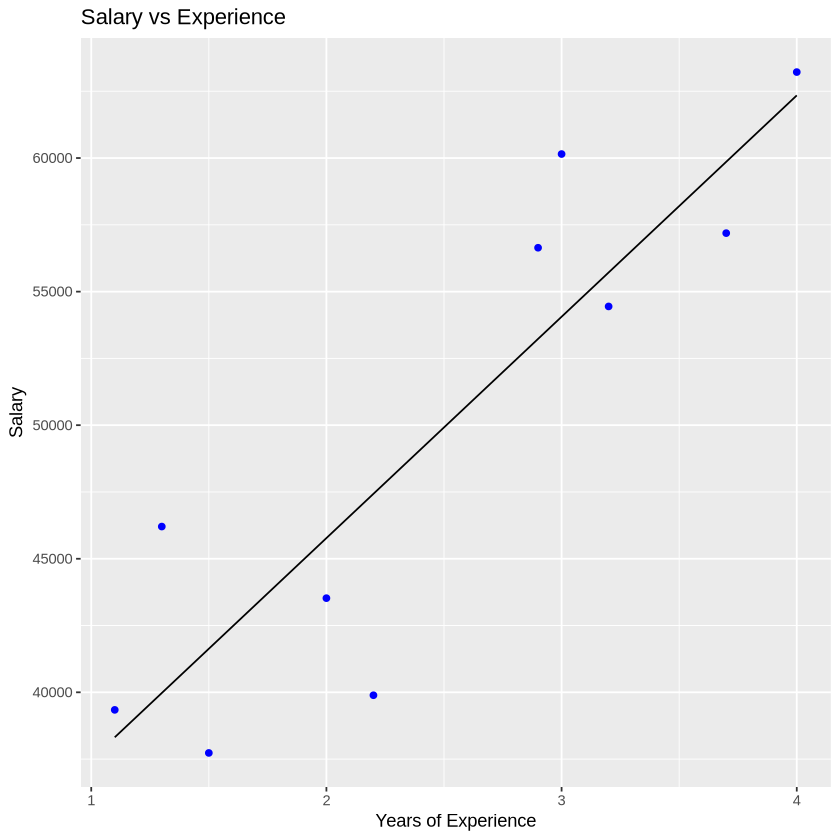

In [6]:
library(ggplot2)
ggplot() +
    geom_point(aes(x = dataset$YearsExperience, y = dataset$Salary), colour = 'blue') +
    geom_line(aes(x = dataset$YearsExperience, y = predict(model, newdata = dataset)), colour = 'black') +
    ggtitle('Salary vs Experience') +
    xlab('Years of Experience') +
    ylab('Salary')

In [7]:
summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7540.2 -2564.9  -199.1  2814.8  6230.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        29204       4092   7.136 9.84e-05 ***
YearsExperience     8285       1532   5.407 0.000641 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4680 on 8 degrees of freedom
Multiple R-squared:  0.7852,	Adjusted R-squared:  0.7583 
F-statistic: 29.24 on 1 and 8 DF,  p-value: 0.0006407


`geom_smooth()` using formula = 'y ~ x'
Saving 7 x 7 in image
`geom_smooth()` using formula = 'y ~ x'


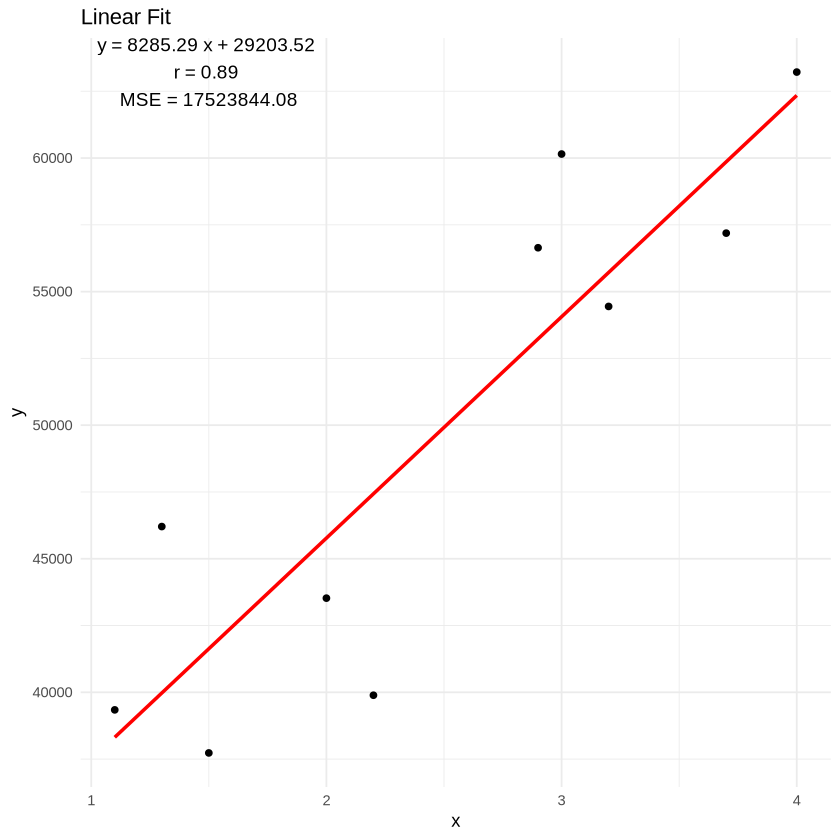

In [9]:
library(ggplot2)

# Data
df <- data.frame(
  x = c(dataset$YearsExperience),
  y = c(dataset$Salary)
)

# Fit model
model <- lm(y ~ x, data = df)
slope <- coef(model)[2]
intercept <- coef(model)[1]
r <- cor(df$x, df$y)
pred <- predict(model)
mse <- mean((df$y - pred)^2)

# Plot
ggplot(df, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  annotate("text", x = 1.5, y = max(df$y) - 0.5,
           label = paste("y =", round(slope, 2), "x +", round(intercept, 2),
                         "\nr =", round(r, 2), "\nMSE =", round(mse, 2)),
           size = 4) +
  labs(title = "Linear Fit",
       x = "x", y = "y") +
  theme_minimal()

ggsave("regression_plot_r.png")

The slope of 8285.29 shows that on average, for every 1 year additional year of experience, salary increases by $8,285.29.

The intercept of 29203.52 shows that the starting salary with 0 years of experience is $29,203.52.

The correlation coefficient, 0.89, indicates a strong positive relationship between Years of Experience and Salary. 

The high MSE of 17523844 shows that the actual data is not very close to the predicted data, indicating the model is not very strong. This is most likely due to the small n value.